In [1]:
import numpy as np
import pandas as pd
import math
import os
import datetime

from sklearn.svm import SVR
from DP_LSTM import *
from keras.models import load_model
from pandas.tools.plotting import autocorrelation_plot
from sklearn.preprocessing import MinMaxScaler
from Plot_Self_Correlation import plot_auto_corr

from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
def walkfiles(rootdir): # 返回file路径的list
    flist = os.listdir(rootdir) #列出文件夹下所有的目录与文件
    pathContainer = []
    filenameContainer = []
    for i in range(0,len(flist)):
        path = os.path.join(rootdir,flist[i])
        if os.path.isfile(path):
            pathContainer.append(path)
            filenameContainer.append(flist[i])
    return pathContainer,filenameContainer

rootdir = r'D:\WORK__wells\GraduateProgram\Data\DailyData'
pathContainer,filenameContainer = walkfiles(rootdir)

In [12]:
#首先对一种货币进行短期预测实验
# 第i个文件
'''
['D:\\WORK__wells\\GraduateProgram\\Data\\DailyData\\AUDUSD.csv',
 'D:\\WORK__wells\\GraduateProgram\\Data\\DailyData\\EURUSD.csv',
 'D:\\WORK__wells\\GraduateProgram\\Data\\DailyData\\GBPUSD.csv',
 'D:\\WORK__wells\\GraduateProgram\\Data\\DailyData\\USDCAD.csv',
 'D:\\WORK__wells\\GraduateProgram\\Data\\DailyData\\USDCHF.csv',
 'D:\\WORK__wells\\GraduateProgram\\Data\\DailyData\\USDCNY.csv',
 'D:\\WORK__wells\\GraduateProgram\\Data\\DailyData\\USDJPY.csv',
 'D:\\WORK__wells\\GraduateProgram\\Data\\DailyData\\外汇数据.xlsx']
'''
i = 0
ExgRate_pd = pd.read_csv(pathContainer[i])
ExgRate_pd['DateTime'] = pd.to_datetime(ExgRate_pd.Date)
ExgRate_pd['ExgRate'] = ExgRate_pd.close
ExgRate_pd.drop(['Date','open','high','low','close'],axis=1,inplace=True)
ExgRate_pd = ExgRate_pd.loc[ExgRate_pd.DateTime>'2009']
ExgRate_pd.index = [i for i in range(ExgRate_pd.shape[0])]

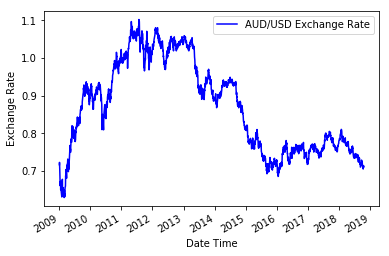

In [15]:
# 总体上查看一下汇率数据
def DrawExgRate(ExgRate_pd):
    x = ExgRate_pd['DateTime']
#     plt.figure(figsize=(10,6), dpi=80)
    plt.subplot(1,1,1)
    plt.plot(x,ExgRate_pd['ExgRate'],color='b',label='AUD/USD Exchange Rate')
    # plt.plot(x,plot_pd['TrnsferPredict'],color='g',label='Transfer LSTM')
    plt.xlabel(r'Date Time')
    plt.ylabel(r'Exchange Rate')
    plt.gcf().autofmt_xdate()
    plt.legend()
    plt.savefig(r'D:\WORK__wells\GraduateProgram\Pics\USDCNY.jpg')
    plt.show()
    return 
DrawExgRate(ExgRate_pd)

In [5]:
preTrained_pd = ExgRate_pd.loc[ExgRate_pd.DateTime < '2015']
preTrained_pd.index = [i for i in range(preTrained_pd.shape[0])]
data_pd = ExgRate_pd.loc[ExgRate_pd.DateTime > '2015']
data_pd.index = [i for i in range(data_pd.shape[0])]

A:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


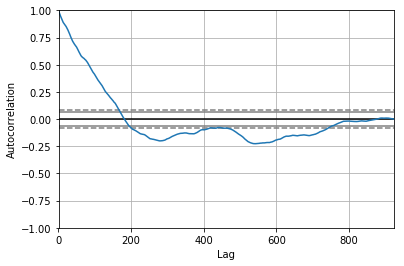

In [18]:
autocorrelation_plot(data_pd.ExgRate)

In [20]:
result_pd = pd.read_csv(r'D:\WORK__wells\GraduateProgram\Result\Transfer_Result_USDCNY.csv')
result_pd

,Timescale,RMSE,MAE,MAPE,T-RMSE,T-MAE,T-MAPE
0,1,0.043535,0.032351,0.493847,0.040045,0.029669,0.453006
1,2,0.065836,0.048583,0.741404,0.062563,0.046630,0.712194
2,3,0.092715,0.071483,1.090316,0.088020,0.068467,1.045863
3,4,0.107670,0.082540,1.260193,0.106688,0.080611,1.233433
4,5,0.139696,0.110790,1.690639,0.123084,0.096847,1.481441
5,6,0.157514,0.128675,1.966551,0.145989,0.119687,1.832056
6,7,0.169577,0.145225,2.213715,0.160713,0.137319,2.098477


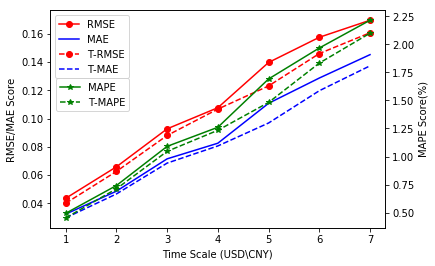

In [21]:
x = result_pd['Timescale']
# plt.figure(figsize=(10,6), dpi=80)
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.plot(x,result_pd['RMSE'],marker='o',color='r',label='RMSE')
ax1.plot(x,result_pd['MAE'],color='b',label='MAE')


ax1.plot(x,result_pd['T-RMSE'],marker='o',color='r',label='T-RMSE',linestyle = 'dashed')
ax1.plot(x,result_pd['T-MAE'],color='b',label='T-MAE',linestyle = 'dashed')

ax1.set_ylabel(r'RMSE/MAE Score')
# ax1.set_xlabel(r'Time Scale (EUR\USD -> USDCNY)')
ax1.set_xlabel(r'Time Scale (USD\CNY)')
ax1.legend()

ax2 = ax1.twinx()  # this is the important function
ax2.plot(x,result_pd['MAPE'],marker='*',color='g',label='MAPE')
ax2.plot(x,result_pd['T-MAPE'],marker='*',color='g',label='T-MAPE',linestyle = 'dashed')
# ax2.set_ylim([1, 2.5])
ax2.set_ylabel('MAPE Score(%)')


ax2.legend(bbox_to_anchor = (0.25,0.71))
plt.savefig(r'D:\WORK__wells\GraduateProgram\Pics\Transfer_Result_USDCNY.jpg')
plt.show()

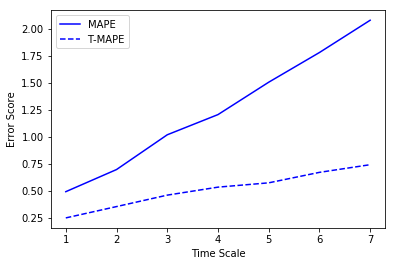